In [50]:
# This is Assignment 3 implementation by
# Abdul Saboor (20L-1113)
# Komal Akhlaq (20L-1278)

Implementation of Question 1 starts here

In [51]:
import pandas as pd
from sklearn.model_selection import train_test_split

data=pd.read_excel('/content/diabetes.xlsx')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [52]:
# separating data into explanatory and response variables
explanatory_var=data.drop(columns={'Outcome','SkinThickness'},axis=1)
response_var=data['Outcome']
explanatory_var

,Pregnancies,Glucose,BloodPressure,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,0,33.6,0.627,50
1,1,85,66,0,26.6,0.351,31
2,8,183,64,0,23.3,0.672,32
3,1,89,66,94,28.1,0.167,21
4,0,137,40,168,43.1,2.288,33
...,...,...,...,...,...,...,...
763,10,101,76,180,32.9,0.171,63
764,2,122,70,0,36.8,0.340,27
765,5,121,72,112,26.2,0.245,30
766,1,126,60,0,30.1,0.349,47


In [53]:
# splitting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(explanatory_var,response_var,test_size=0.25,train_size=0.75,random_state=0)

In [59]:
# implementing logistic regression
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()

# fitting the model on trainig data
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [55]:
# creating confusion matrix
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]])

Text(0.5, 15.0, 'Predicted label')

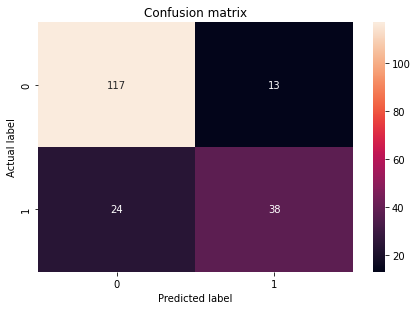

In [56]:
# visualizing confusion matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap=None ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [57]:
# printing precision, accuracy and recall
print(f"Accuracy: {metrics.accuracy_score(y_test, y_pred)}")
print(f"Precision: {metrics.precision_score(y_test, y_pred)}")
print(f"Recall: {metrics.recall_score(y_test, y_pred)}")

Accuracy: 0.8072916666666666
Precision: 0.7450980392156863
Recall: 0.6129032258064516
